# k plus proches voisins - en régression

Données : auto-mpg

disponible sur https://raw.githubusercontent.com/ContinuumIO/cdx/master/cdx/remotedata/auto-mpg.csv

In [52]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors,KNeighborsRegressor
from sklearn.preprocessing import scale
from sklearn.cross_validation import cross_val_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA,RandomizedPCA
from sklearn.linear_model import Ridge

In [53]:
# Fonctions

In [54]:
data = pd.read_csv('auto-mpg.csv')

In [55]:
# https://raw.githubusercontent.com/ContinuumIO/cdx/master/cdx/remotedata/auto-mpg.csv
data.drop(['origin','name'],axis=1,inplace=True)
data = data.rename(columns={'displ':'cc','cyl':'ncyl'})

In [56]:
data.head(2)

,mpg,ncyl,cc,hp,weight,accel,yr
0,18,8,307,130,3504,12.0,70
1,15,8,350,165,3693,11.5,70


In [57]:
data.describe()

,mpg,ncyl,cc,hp,weight,accel,yr
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


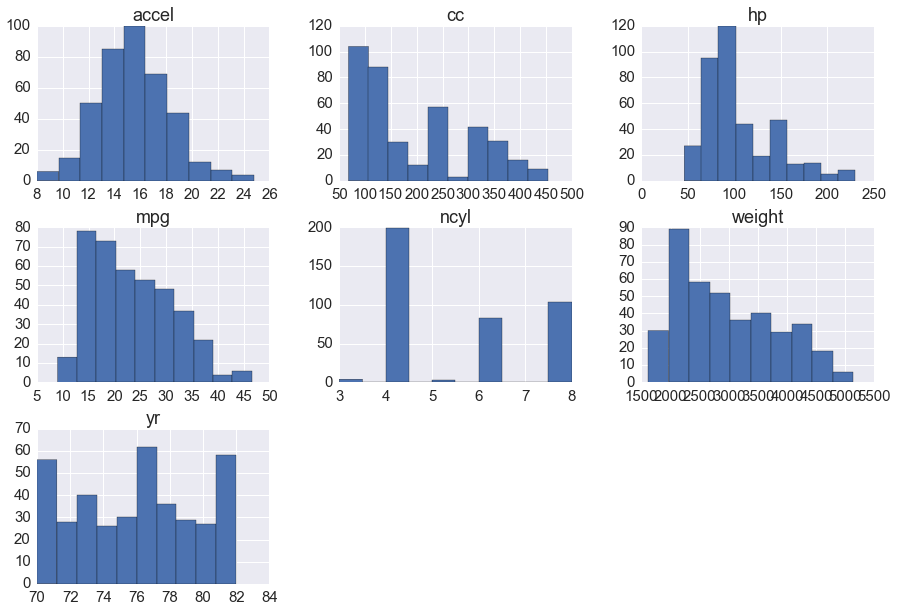

In [58]:
data.hist(figsize=(15,10))
pass

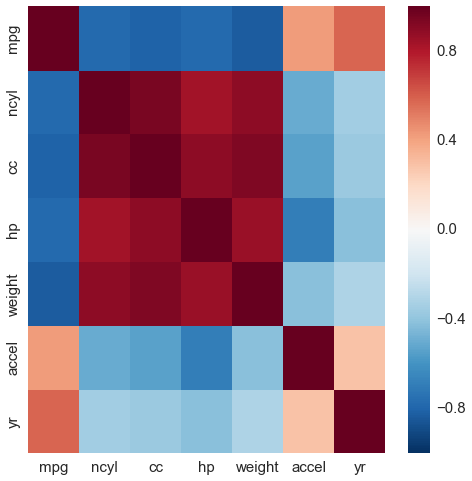

In [59]:
import seaborn as sea
sea.set(font_scale=1.5)
plt.figure(figsize=(8, 8))
sea.heatmap( data.corr() )

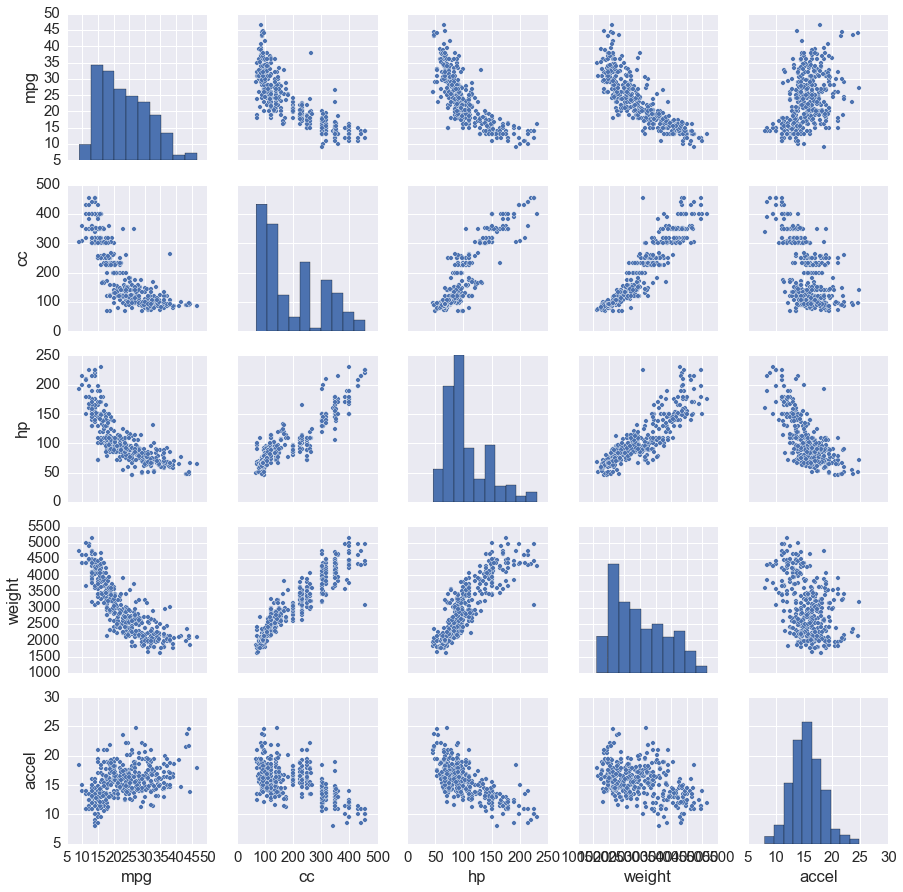

In [60]:
sea.pairplot(  data.drop(['ncyl','yr'],axis=1)  )

In [61]:
X = data[['weight','hp']].as_matrix().astype(np.float)
y = data['mpg'].as_matrix()
X,y = shuffle(X,y)

X0 = X[:,[0]]
X1 = X[:,[1]]

<matplotlib.colorbar.Colorbar instance at 0x10f8679e0>

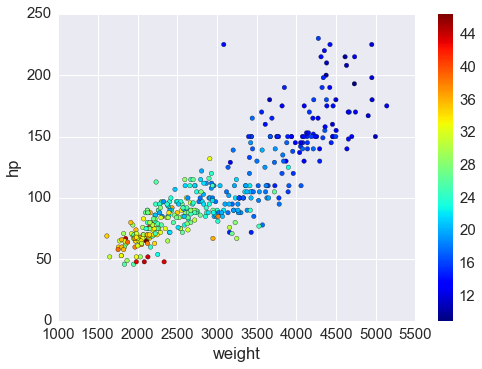

In [62]:
plt.scatter( X0,X1,c=y,cmap='jet')
plt.xlabel('weight')
plt.ylabel('hp')
plt.colorbar()

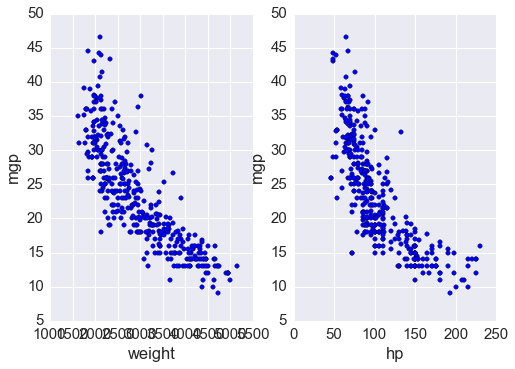

In [63]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.scatter( X0,y ); ax1.set_xlabel('weight') ; ax1.set_ylabel('mgp')
ax2.scatter( X1,y ); ax2.set_xlabel('hp') ; ax2.set_ylabel('mgp')

### Avant de commencer: Ridge Regression


In [64]:
print np.mean( cross_val_score( Ridge(alpha=0.0).fit(X,y) ,X,y) )

X_augment = np.hstack((X,X**3,X0*X1))
print np.mean( cross_val_score( Ridge(alpha=0.0).fit(X_augment,y) ,X_augment,y) )

0.704273447534
0.736409665355


### Comparaison des y réels avec y prédits par régression ridge augmentée

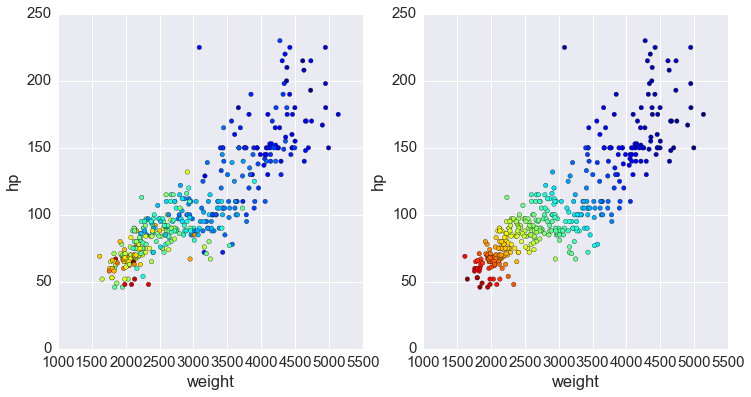

In [65]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax1.scatter( X0,X1,c=y,cmap='jet')
ax1.set_xlabel('weight'); ax1.set_ylabel('hp')

ri = Ridge().fit(X_augment,y)
ax2.scatter( X0,X1,c=ri.predict(X_augment),cmap='jet')
ax2.set_xlabel('weight'); ax2.set_ylabel('hp')

### Prediction du 1-ppv

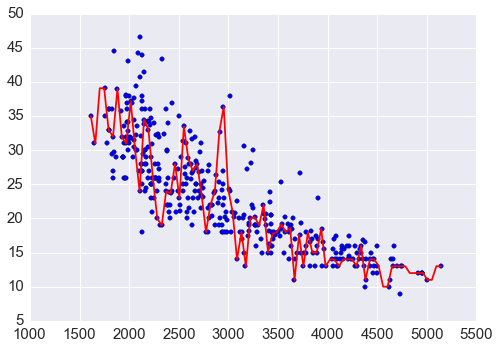

In [66]:
def show_1d_model(model,x,y):
    plt.scatter( x,y )
    z = np.linspace(min(x),max(x),80).reshape(80,1)
    plt.plot(z,model.predict(z),c='r')

show_1d_model( KNeighborsRegressor(n_neighbors=1).fit(X0,y) , X0 , y)

### Prediction du 10-ppv

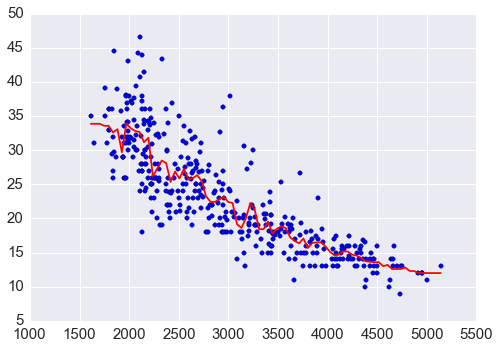

In [67]:
show_1d_model( KNeighborsRegressor(n_neighbors=10).fit(X0,y) , X0 , y)

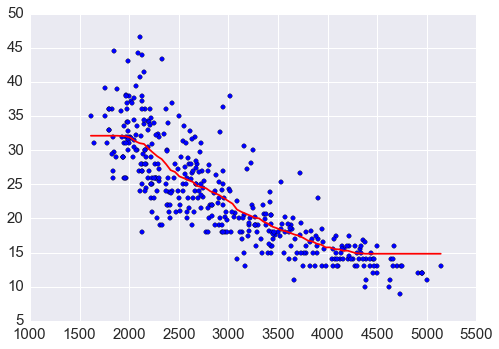

In [68]:
show_1d_model( KNeighborsRegressor(n_neighbors=100).fit(X0,y) , X0 , y)

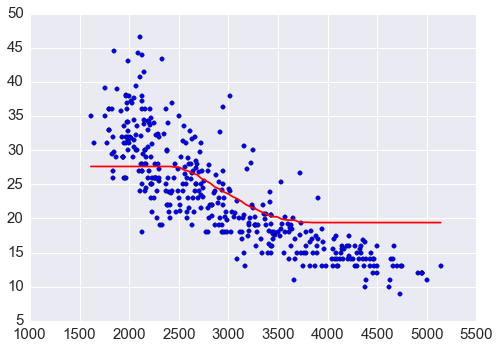

In [69]:
show_1d_model( KNeighborsRegressor(n_neighbors=250).fit(X0,y) , X0 , y)

### Scores des plus-proches voisins

In [70]:
print np.mean( cross_val_score( KNeighborsRegressor(n_neighbors=30).fit(X1,y) ,X1,y) )
print np.mean( cross_val_score( KNeighborsRegressor(n_neighbors=30).fit(X1,y) ,X1,y) )
print np.mean( cross_val_score( KNeighborsRegressor(n_neighbors=30).fit(X,y) ,X,y) )

0.697216333647
0.697216333647
0.712322809359


### Avec normalisation

In [71]:
X = scale(X)
print np.mean( cross_val_score( KNeighborsRegressor(n_neighbors=30).fit(X,y) ,X,y) )

0.748002622421


## Utilisation de l'ACP

 moyennes = -2.22044604925e-16 et -8.91731133379e-16
variances= 1.0 et 1.0


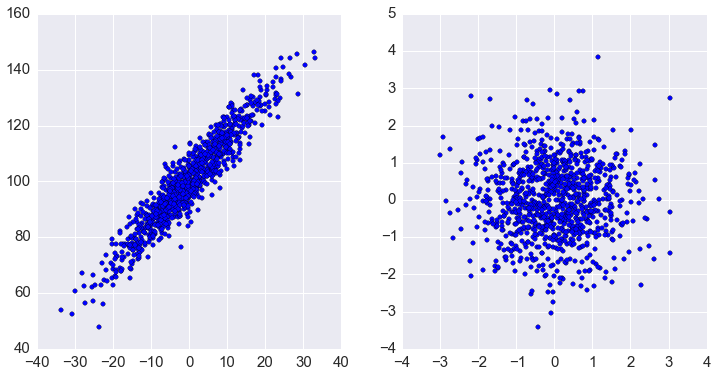

In [74]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

Z = np.random.normal(size=(1000,1)).reshape(1000,1)
Z = np.hstack((Z*10.0,100+Z*15.0+5*np.random.normal(size=(1000,1))))
ax1.scatter( *Z.T )

zx,zy = PCA(whiten=True).fit(Z).transform(Z).T # Attention: l'option whiten assure que les variances seront à 1
ax2.scatter(zx,zy)

print "moyennes =",np.mean(zx),"et",np.mean(zy)
print "variances=",np.var(zx),"et",np.var(zy)

### Score en validation croisée sur des données après ACP

In [75]:
X_pca = RandomizedPCA(n_components=1,whiten=True).fit(X).transform(X)
print np.mean( cross_val_score( KNeighborsRegressor(n_neighbors=30).fit(X_pca,y) ,X_pca,y) )

0.749819357995


## Recherche du meilleur scaling

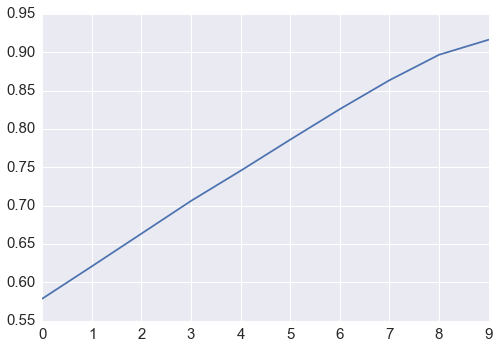

In [77]:
def local_PCA(X,y,k=10,percent=50):
    nn = NearestNeighbors(n_neighbors=k).fit(X)
    tous_voisins = nn.kneighbors(return_distance=False)
    local_vectors = np.empty((0,len(X.T)))

    for p,yp,ivoisins in zip(X,y,tous_voisins):
        d_yp_yvoisins = np.abs( y[ivoisins] - yp )
        meilleurs_voisins = ivoisins[d_yp_yvoisins < np.percentile(d_yp_yvoisins,percent)]
        local_vectors = np.vstack( (local_vectors , p - X[meilleurs_voisins] ))

    pca = RandomizedPCA(whiten=True).fit( local_vectors )
    return pca.transform(X)

# Testing local_PCA
Z = np.random.normal(size=(5000,2))
zy=  np.sin(15*Z[:,0] + -8*Z[:,1]  )

scores = []
for i in range(10):
    scores.append( np.mean( cross_val_score( KNeighborsRegressor(n_neighbors=10).fit(Z,zy) ,Z,zy) ) )
    Z = local_PCA(Z,zy)
plt.plot(scores)

In [90]:
X_local = scale(X)
for i in range(20):
    print np.mean( cross_val_score( KNeighborsRegressor(n_neighbors=30).fit(X_local,y) ,X_local,y) )
    X_local = local_PCA(X_local,y,k=10,percent=30)


0.747785316278
0.748251560068
0.748601209224
0.747987333631
0.748389386278
0.748949240768
0.749339121962
0.749674692274
0.750480542534
0.751556182585
0.751586659259
0.750431762017
0.751764284737
0.752079779686
0.752179314468
0.752079295998
0.752195147759
0.752331104926
0.752261322471
0.752156418035
